In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 1

# Test ADALINE

In [2]:
import pickle

with open('../../datasets/processed/trec2007-1607061515-features.dat', 'rb') as infile:
    X = pickle.load(infile)

with open('../../datasets/processed/trec2007-1607061515-labels.dat', 'rb') as infile:
    Y = pickle.load(infile)

print('X is a %s \t %s' % (X.shape, type(X)))
print('Y is a %s \t %s' % (Y.shape, type(Y)))

X is a (75419, 10000) 	 <class 'numpy.ndarray'>
Y is a (75419, 1) 	 <class 'numpy.matrixlib.defmatrix.matrix'>


In [3]:
from adaline import max_iters

add_bias = lambda x: np.insert(x, 0, values=1, axis=1) # add bias term
convert_labels = lambda y: y*2 - 1

## reduce dataset to go faster during prototyping
N_keep = 20000
X = X[:N_keep]
Y = Y[:N_keep]

In [14]:
%aimport adaline

### With labels 0 and 1

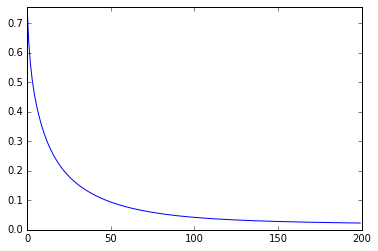

0.022912822863


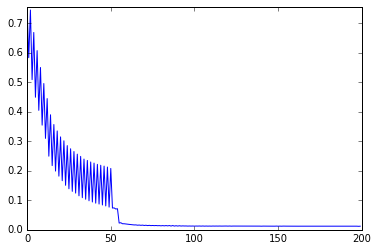

0.0122


In [5]:
x = add_bias(X)
y = Y           # keep labels to 0,1

weights, cost, error = adaline.train_adaline(features=x, labels=y,
                                             rate=0.061,
                                             termination_condition=max_iters(200),
                                             label_type='01',
                                             verbose=False)

plt.plot(cost)
plt.ylim(0, cost[0])
plt.show()
print(' cost at iteration 200: %.3f' % cost[-1])

plt.plot(error)
plt.ylim(0, error[0])
plt.show()
print('error at iteration 200: %.3f' % error[-1])

### With labels -1 and 1

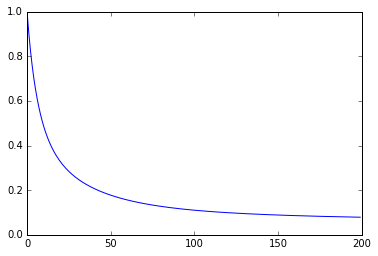

0.0787657436814


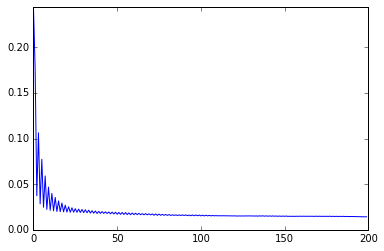

0.0143


In [7]:
x = add_bias(X)
y = convert_labels(Y)

weights, cost, error = adaline.train_adaline(features=x, labels=y,
                                             rate=0.061,
                                             termination_condition=max_iters(200),
                                             label_type='-11',
                                             verbose=False)

plt.plot(cost)
plt.ylim(0, cost[0])
plt.show()
print(' cost at iteration 200: %.3f' % cost[-1])

plt.plot(error)
plt.ylim(0, error[0])
plt.show()
print('error at iteration 200: %.3f' % error[-1])

### With learning rate of 0.062

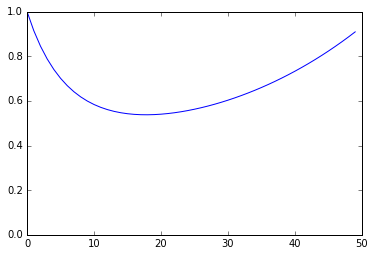

 cost at iteration 200: 0.909


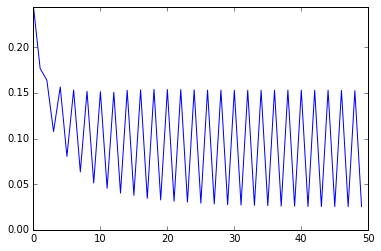

error at iteration 200: 0.025


In [9]:
x = add_bias(X)
y = convert_labels(Y)

weights, cost, error = adaline.train_adaline(features=x, labels=y,
                                             rate=0.062,
                                             termination_condition=max_iters(50),
                                             label_type='-11',
                                             verbose=False)

plt.plot(cost)
plt.ylim(0, cost[0])
plt.show()
print(' cost at iteration 200: %.3f' % cost[-1])

plt.plot(error)
plt.ylim(0, error[0])
plt.show()
print('error at iteration 200: %.3f' % error[-1])

### with different, random starting weights

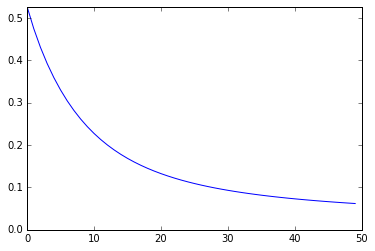

 cost at iteration 200: 0.062


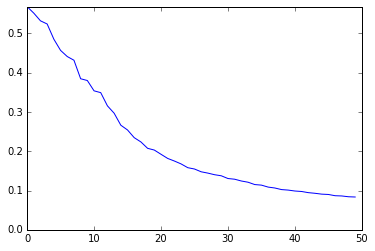

error at iteration 200: 0.084


In [20]:
x = add_bias(X)
y = Y           # keep labels to 0,1

weights, cost, error = adaline.train_adaline(features=x, labels=y,
                                             W=np.random.rand(x.shape[1], 1)*0.01,
                                             rate=0.061,
                                             termination_condition=max_iters(50),
                                             label_type='01',
                                             verbose=False)

plt.plot(cost)
plt.ylim(0, cost[0])
plt.show()
print(' cost at iteration 200: %.3f' % cost[-1])

plt.plot(error)
plt.ylim(0, error[0])
plt.show()
print('error at iteration 200: %.3f' % error[-1])

## Cost and error for the whole dataset and 10000 features

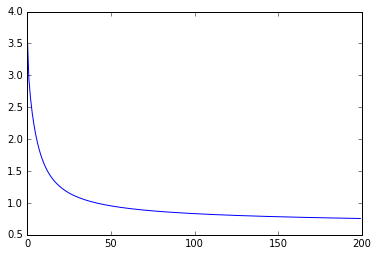

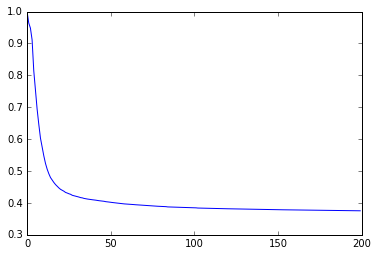

In [68]:
plt.plot(cost)
plt.show()
plt.plot(error)
plt.show()